# Итоговая работа.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance
from scipy.optimize import minimize
%matplotlib inline

## Задание 1
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [8]:
i=0
aim_list = []
for user0 in raitings:
    a = np.array([(distance.cosine(user0,user1), user1) for user1 in np.concatenate([raitings[:i], raitings[i+1:]])])
    aim_list.append([user0]+[z[1] for z in a if z[0] == max(a.T[0])])
    i=i+1
aim_list

[[array([ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6]),
  array([ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2])],
 [array([ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7]),
  array([ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3])],
 [array([ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6]),
  array([ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2])],
 [array([6, 1, 9, 7, 7, 9, 2, 3, 5, 1, 6, 6, 3, 2, 7]),
  array([ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6])],
 [array([ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6]),
  array([6, 1, 9, 7, 7, 9, 2, 3, 5, 1, 6, 6, 3, 2, 7])],
 [array([ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1]),
  array([ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2])],
 [array([ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2]),
  array([ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6])],
 [array([ 4,  1,  6,  4,  3, 

b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(raitings)
pca.transform(raitings)

array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])

## Задание 2
Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

In [10]:
from scipy.misc import derivative
def f(x):
    return np.tan(np.sin(x)+np.cos(2*x+3))**2
print('Первая производная: ', derivative(f, 1.0, dx=1e-6, n=1))

Первая производная:  55.3859176464222


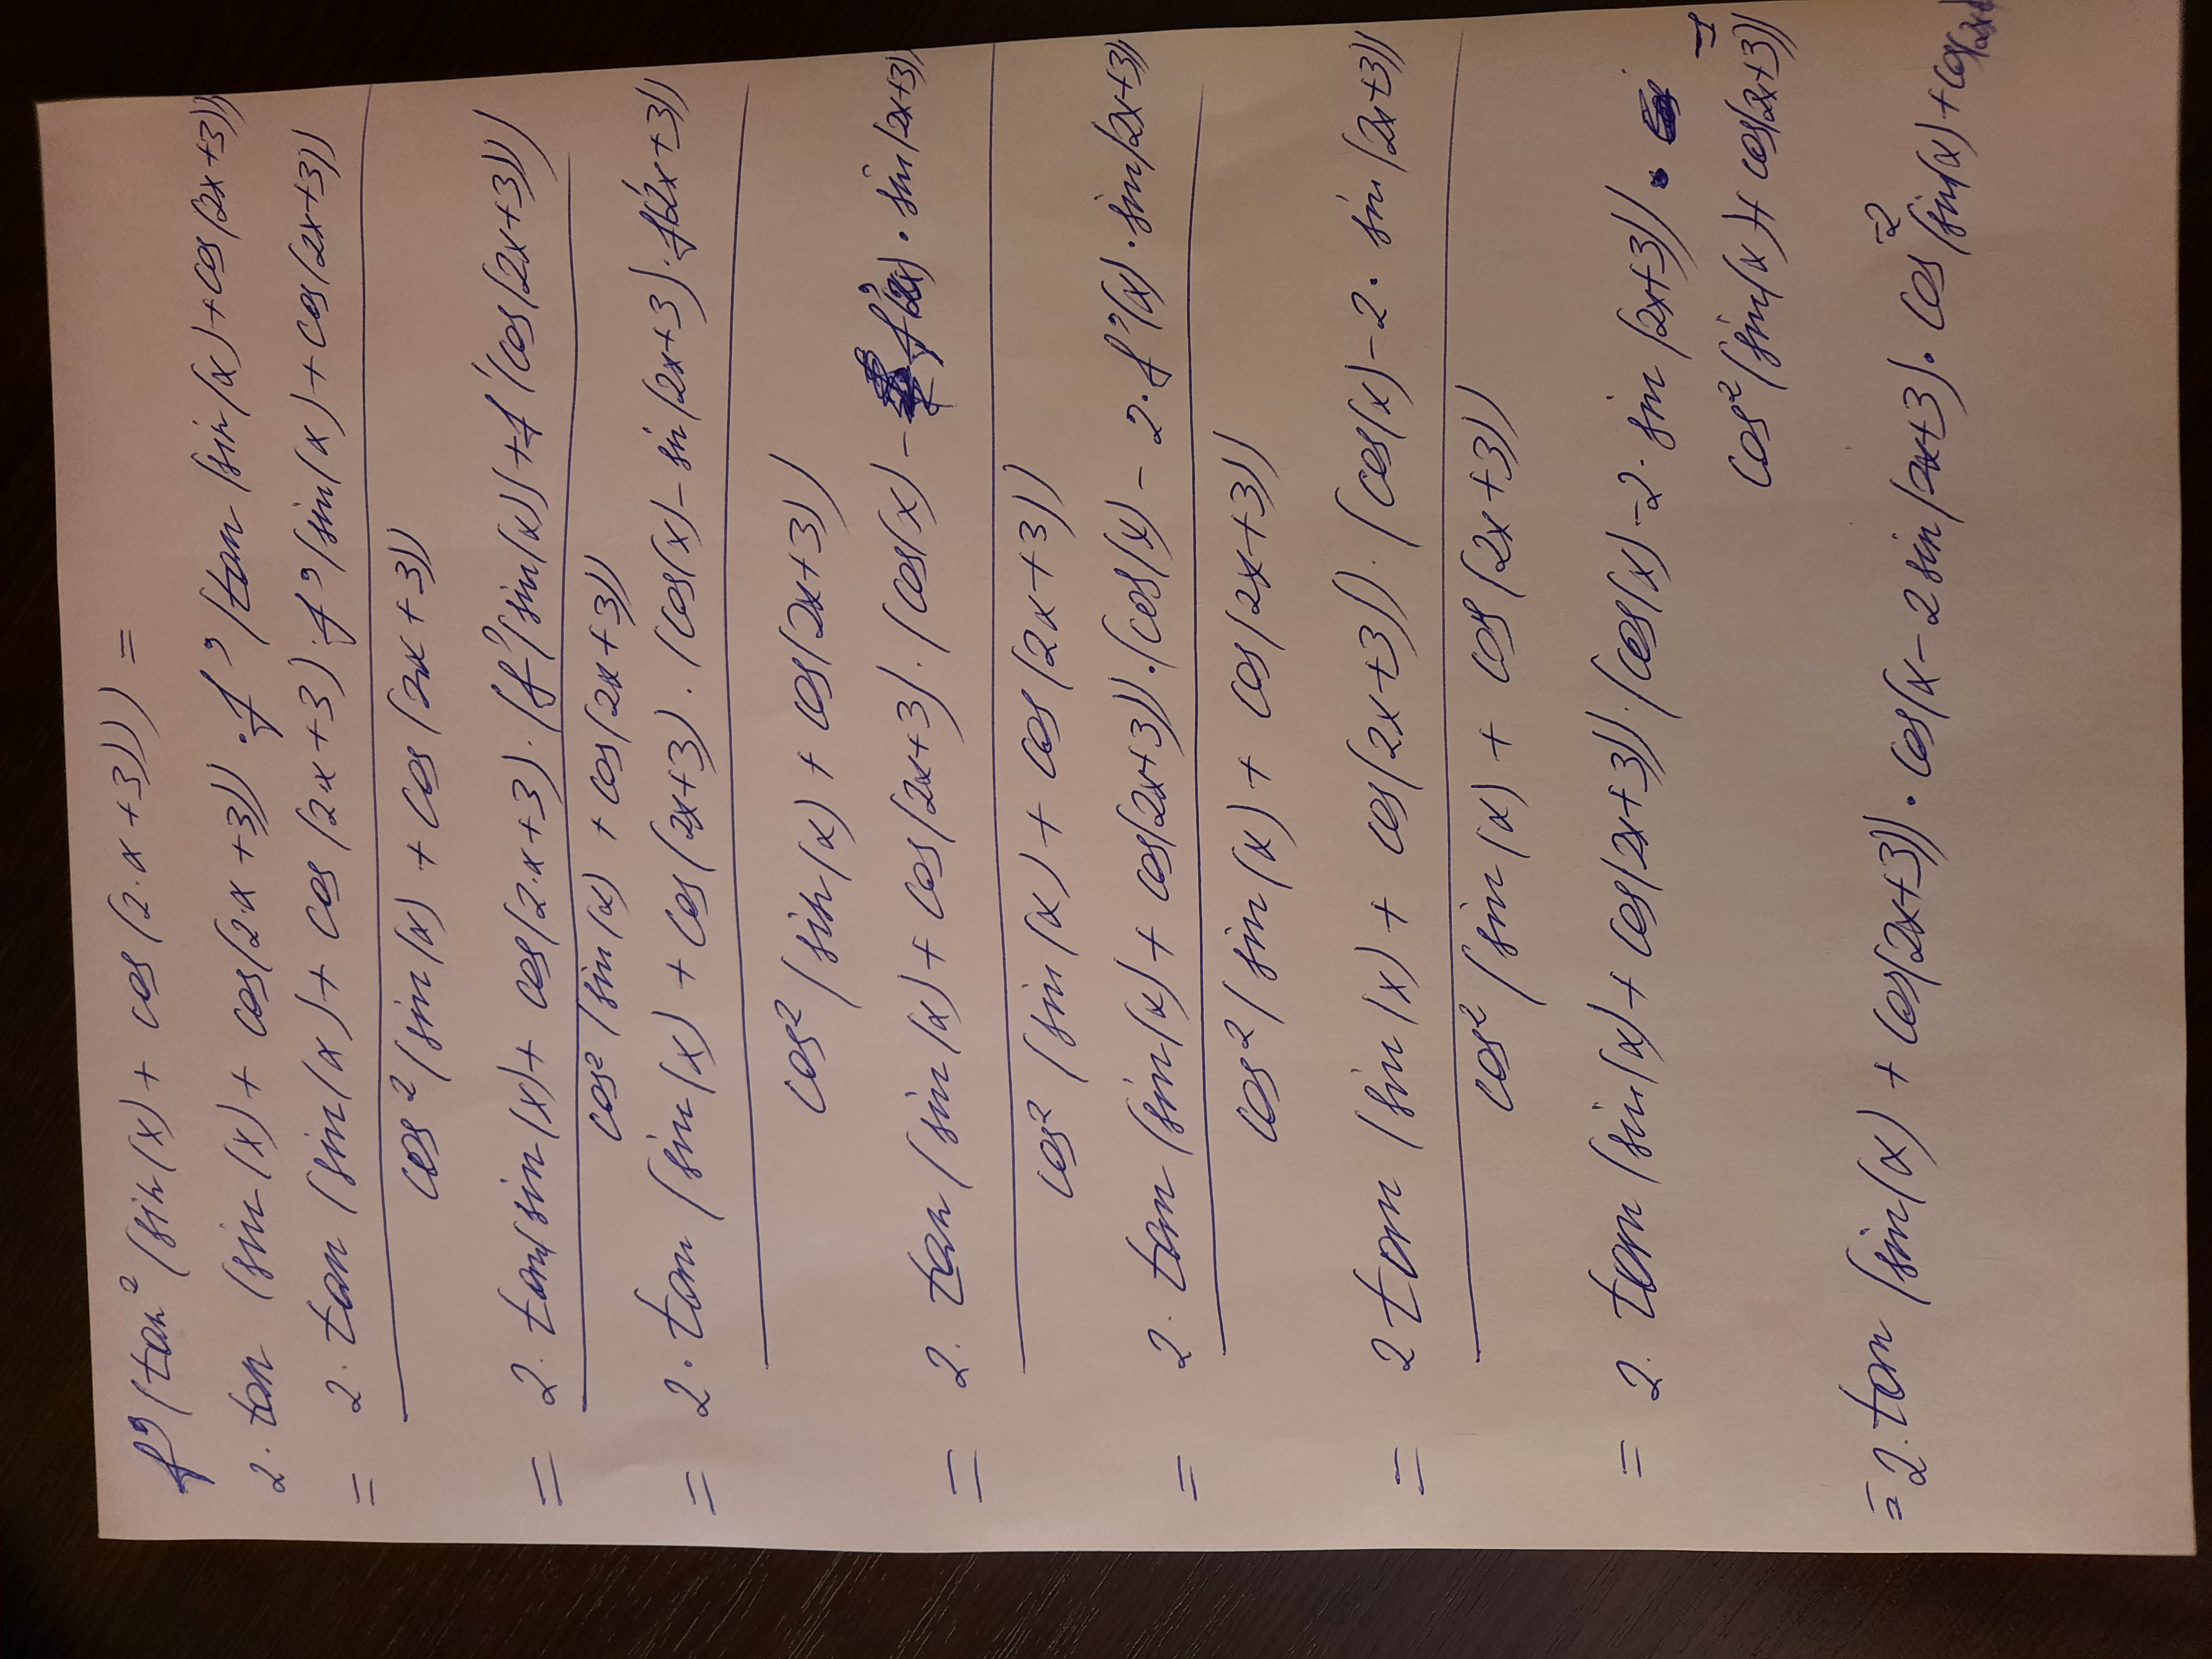

In [11]:
def f(x):
    return 2*np.tan(np.sin(x)+np.cos(2*x+3))*(np.cos(x)-2*np.sin(2*x+3))*(np.cos(np.sin(x)+np.cos(2*x+3)))**(-2)
f(1)

55.38591763533786

## Задание 3
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

In [2]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [3]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [4]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

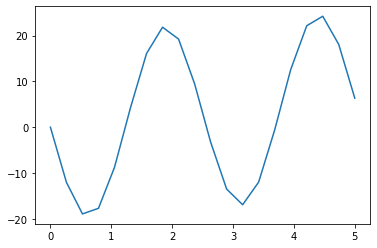

In [5]:
plt.plot(x, fx)
plt.show()

In [6]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [10]:
params = np.array([0, 0])
minimize(error, params, method='COBYLA').x

array([ 3.00018796, -2.50008926])

In [11]:
a = minimize(error, params, method='COBYLA').x[0]
b = minimize(error, params, method='COBYLA').x[1]

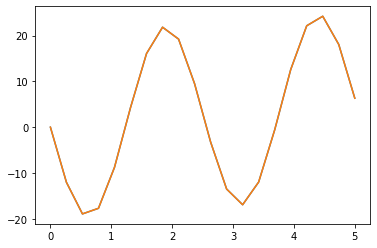

In [12]:
plt.plot(x, fx)
f1 = f(x, a, b)
plt.plot(x, f1)
plt.show()

## Задание 4
Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

(array([  3.,   1.,   2.,  12.,  20.,  31.,  47.,  82., 101., 110., 133.,
        132.,  99.,  75.,  58.,  45.,  20.,  12.,  13.,   4.]),
 array([34.32 , 35.607, 36.894, 38.181, 39.468, 40.755, 42.042, 43.329,
        44.616, 45.903, 47.19 , 48.477, 49.764, 51.051, 52.338, 53.625,
        54.912, 56.199, 57.486, 58.773, 60.06 ]),
 <a list of 20 Patch objects>)

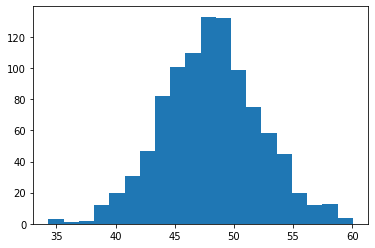

In [20]:
num = [37, 27, 38, 25, 27, 60, 28, 95, 9, 98, 50, 45, 68, 85, 35, 73, 3, 6, 89, 64]
plt.hist([np.mean(np.random.choice(num, size=50)) for i in range(1000)], bins=20)

## Задание 5
Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):

In [21]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [22]:
m = np.array([[1, 4],
              [1, 1]])
print(m)
w, v = np.linalg.eig(m)

[[1 4]
 [1 1]]


In [23]:
for i in range(len(w)):
    print("Собственное значение: ", str(w[i]))
    print("соответствующий ему собственный вектор: ", str(v[:,i]))

Собственное значение:  3.0000000000000004
соответствующий ему собственный вектор:  [0.89442719 0.4472136 ]
Собственное значение:  -0.9999999999999996
соответствующий ему собственный вектор:  [-0.89442719  0.4472136 ]


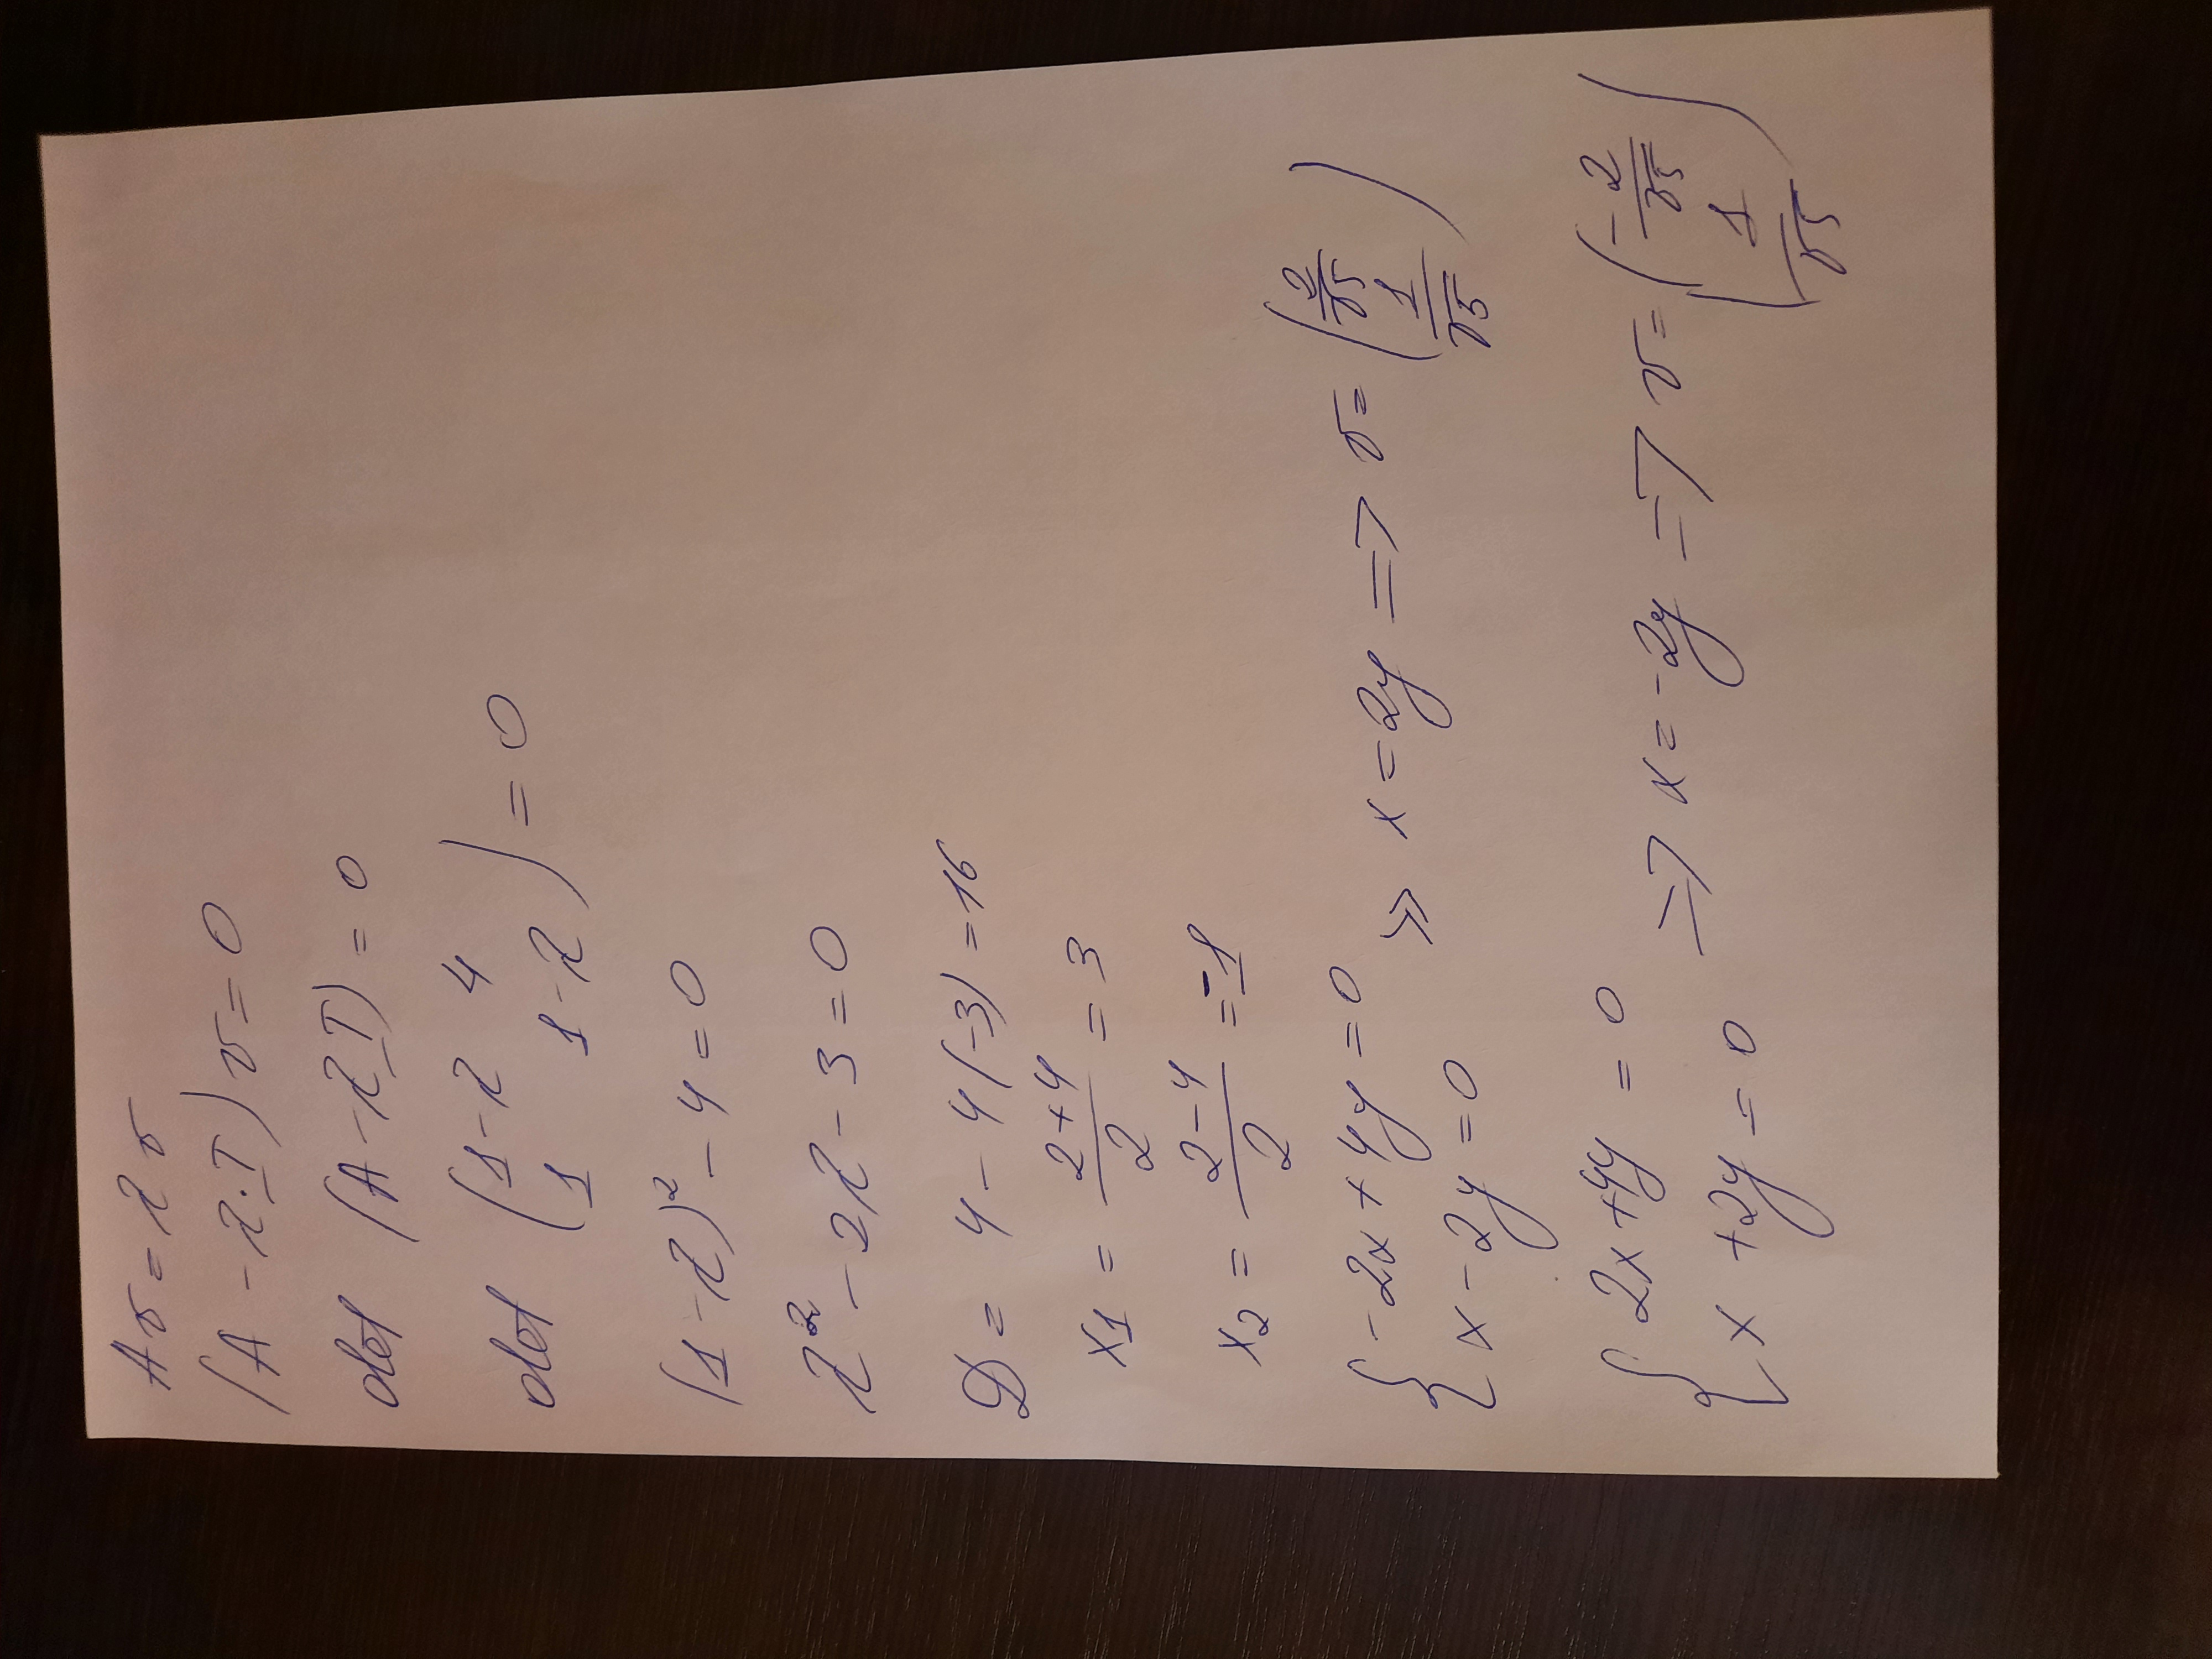